В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from numpy import arange
import  matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

# 1.Получите и загрузите данные.

In [ ]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 2.Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
cols_to_drop = [] # ищем столбы с пропущенными значениями более 50%

for col in data.columns:
    if data[col].isna().sum() / data.shape[0] > 0.5:
        cols_to_drop.append(col)

cols_to_drop

['Cabin']

In [ ]:
data = data.drop(columns=cols_to_drop) # удаляем столбцы с большим кол-вом пропусков

In [ ]:
data=data.dropna() # удаляем строки с оставшимися пропусками

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [ ]:
data=data.drop(['Name','Sex','Ticket', 'Embarked'], axis=1) # удаляем категориальные переменные
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [ ]:
X=data[['PassengerId','Pclass','Age', 'SibSp','Parch','Fare']]
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [ ]:
data['Survived'].unique()

array([0, 1])

Целевой признак Survived (1 – пассажир выжил, 0 – погиб).

In [ ]:
Y = data['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Разбиваем данные на обучающую и тестовую выборки в соотношении 80 / 20

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 0)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(Y_test, predictions[:,1])

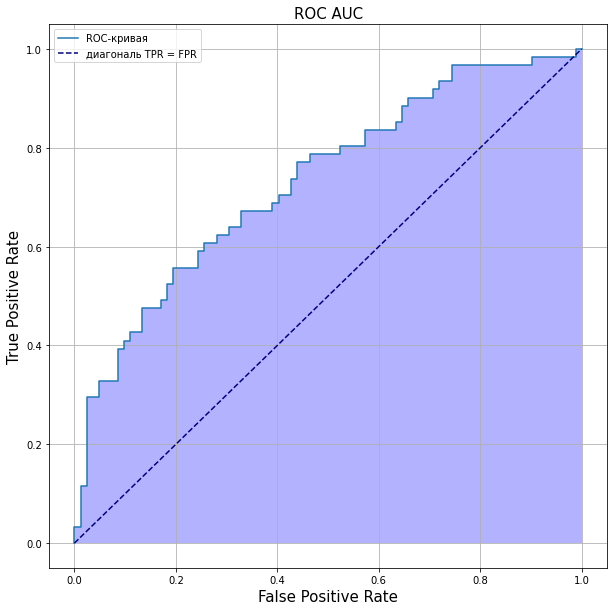

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label = 'ROC-кривая')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = 'диагональ TPR = FPR')
plt.fill_between(fpr, tpr, facecolor='blue', alpha=0.3)
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.legend( loc = 0 )
plt.grid()
plt.show()

In [ ]:
roc_auc_score(Y_test, predictions[:, 1]) # качество модели получилось хорошее

0.7321071571371451

# 3.Снова загрузите полные данные. 4.Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [ ]:
data1=pd.read_csv('train.csv')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Проанализируем признаки:

PassengerId — id пассажира

Survived — погиб (0) или выжил (1)

Pclass — класс билета (первый (1), второй (2) или третий (3))

Name — имя пассажира

Sex — пол

Age — возраст

SibSp — количество братьев и сестер или супругов на борту

Parch — количество родителей и детей на борту

Ticket — номер билета

Fare — стоимость билета

Cabin — номер каюты

Embarked — порт посадки

Если применять ЛОГИЧЕСКИЙ анализ, без построения графиков, то будем удалять:

PassengerId — это всего лишь порядковый номер в списке, не имеет ценности для анализа

Name — имя не может влиять на выживаемость

Ticket — возможно, в номере билета "сидит" класс и расположение каюты, но у нас для этого есть отдельные признаки (Pclass и Cabin)

Embarked — порт не может влиять на выживаемость

In [ ]:
data1=data1.drop(['PassengerId','Name','Ticket', 'Embarked'], axis=1)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


# 5.Проверьте данные на наличие пропущенных значений. a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски. b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [ ]:
data1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

In [ ]:
print('Если просто удалить все строки с пропусками, то мы потеряем', round((687/891)*100), '% данных')

Если просто удалить все строки с пропусками, то мы потеряем 77 % данных


In [ ]:
# процентный список пропущенных данных
for col in data1.columns:
    pct_missing = np.mean(data1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Survived - 0%
Pclass - 0%
Sex - 0%
Age - 20%
SibSp - 0%
Parch - 0%
Fare - 0%
Cabin - 77%


Для признака 'age' попробуем  заполнить пропущенные значения медианой по принадлежности к другим признакам. Для этого получим уникальные сочетания пола и количества родственников на борту, и выведем для этих сочетаний медианные значения возраста.

In [ ]:
data1.groupby(['Sex', 'SibSp', 'Parch']).agg({'Age':'median'}).reset_index()

,Sex,SibSp,Parch,Age
0,female,0,0,28.5
1,female,0,1,22.0
2,female,0,2,22.0
3,female,0,3,24.0
4,female,0,4,29.0
5,female,0,5,40.0
6,female,1,0,29.0
7,female,1,1,31.0
8,female,1,2,23.0
9,female,1,3,51.0


In [ ]:
data1_age = data1.groupby(['Sex', 'SibSp', 'Parch']).agg({'Age':'median'}).reset_index()
for i, el in data1[data1['Age'].isna()].iterrows():
    data1.loc[i, 'Age'] = data1_age[(data1_age['Sex'] == el['Sex']) & (data1_age['SibSp'] == el['SibSp']) & (data1_age['Parch'] == el['Parch'])]['Age'].values[0]

In [ ]:
data1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           7
SibSp         0
Parch         0
Fare          0
Cabin       687
dtype: int64

In [ ]:
data1 = data1[ pd.isnull( data1['Age'] ) == 0 ] # удаляем оставшиеся 7 пропусков

In [ ]:
data1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       680
dtype: int64

В признаке "Cabin", конечно, очень много пропусков. Удалять жалко, месторасположение каюты может влиять на выживаемость пассажира.

С учетом количества пропусков, заполнять будем классом, указывающим на то, что значение было пропущено.

In [ ]:
data1['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

В этом признаке я бы оставила только буквы, так можно будет идентифицировать палубу.

In [ ]:
# отберем заглавные буквы
data1["Cabin"].fillna('nan').apply(lambda x: str(x)[0]).value_counts()

n    680
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [ ]:
data1["Cabin_b"] = data1["Cabin"].apply((lambda x: str(x)[0]))
data1.head()

In [ ]:
data2=data1.applymap(lambda x: np.nan if x == 'n' else x)
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Cabin_b
0,0,3,male,22.0,1,0,7.2500,NaN,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,NaN
3,1,1,female,35.0,1,0,53.1000,C123,C
4,0,3,male,35.0,0,0,8.0500,NaN,NaN


In [ ]:
data2=data2.drop(['Cabin'], axis=1)
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_b
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C
4,0,3,male,35.0,0,0,8.0500,NaN


In [ ]:
data2['Cabin_b'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Разметим наши данные колонки 'Cabin_b' с помощью LabelEncoder, а затем обучим логистическую регрессию на них и получим предсказанные значения.

In [ ]:
# столбцы с категориальными переменными переводим в значения 0 и 1
data2 = pd.get_dummies (data2, columns = ['Sex'])

In [ ]:
data2['Age']=data2['Age'].astype(int)
data2['Fare']=data2['Fare'].astype(int)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    884 non-null    int64 
 1   Pclass      884 non-null    int64 
 2   Age         884 non-null    int64 
 3   SibSp       884 non-null    int64 
 4   Parch       884 non-null    int64 
 5   Fare        884 non-null    int64 
 6   Cabin_b     204 non-null    object
 7   Sex_female  884 non-null    uint8 
 8   Sex_male    884 non-null    uint8 
dtypes: int64(6), object(1), uint8(2)
memory usage: 57.0+ KB


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_tmp=data2.dropna()
X_tmp.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_b,Sex_female,Sex_male
1,1,1,38,1,0,71,C,1,0
3,1,1,35,1,0,53,C,1,0
6,0,1,54,0,0,51,E,0,1


In [ ]:
le = LabelEncoder()
X_tmp['tr'] = le.fit_transform(X_tmp['Cabin_b'])

Обучаем логистическую регрессию.

In [ ]:
logreg = LogisticRegression()
cols = ['Survived', 'Pclass', 'Sex_male', 'Sex_female',
        'Age', 'SibSp', 'Parch', 'Fare']
logreg.fit(X_tmp[cols], X_tmp['tr'])

Делаем обратное преобразование LabelEncoder и получаем предсказанные данные.

In [ ]:
le.inverse_transform(logreg.predict(data2[data2['Cabin_b'].isna()][cols]))

array(['F', 'F', 'F', 'F', 'F', 'F', 'E', 'F', 'F', 'F', 'E', 'F', 'E',
       'F', 'F', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'F', 'E', 'C',
       'C', 'F', 'F', 'F', 'F', 'F', 'E', 'F', 'E', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'F',
       'F', 'F', 'F', 'F', 'F', 'C', 'F', 'E', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'E', 'F',
       'E', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'E', 'F', 'F', 'C', 'F', 'E', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'E',
       'F', 'F', 'E', 'E', 'E', 'F', 'F', 'C', 'F', 'F', 'F', 'F', 'E',
       'F', 'F', 'F', 'F', 'F', 'C', 'E', 'F', 'F', 'F', 'F', 'F', 'E',
       'F', 'E', 'F', 'F', 'F', 'E', 'F', 'F', 'E', 'F', 'F', 'F', 'F',
       'F', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'E', 'F', 'E',
       'F', 'F', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F

Заполняем ими пропуски.

In [ ]:
data2.loc[data2[data2['Cabin_b'].isna()].index, 'Cabin_b'] = le.inverse_transform(logreg.predict(data2[data2['Cabin_b'].isna()][cols]))

In [ ]:
data2.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin_b       0
Sex_female    0
Sex_male      0
dtype: int64

# 6.Категориальные переменные переведите в цифровые значения.

Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    884 non-null    int64 
 1   Pclass      884 non-null    int64 
 2   Age         884 non-null    int64 
 3   SibSp       884 non-null    int64 
 4   Parch       884 non-null    int64 
 5   Fare        884 non-null    int64 
 6   Cabin_b     884 non-null    object
 7   Sex_female  884 non-null    uint8 
 8   Sex_male    884 non-null    uint8 
dtypes: int64(6), object(1), uint8(2)
memory usage: 89.3+ KB


In [ ]:
data2['Cabin_b'].value_counts()

F    521
E    165
C     83
B     54
D     35
A     21
G      4
T      1
Name: Cabin_b, dtype: int64

In [ ]:
data2 = pd.get_dummies (data2, columns = ['Cabin_b'])

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    884 non-null    int64
 1   Pclass      884 non-null    int64
 2   Age         884 non-null    int64
 3   SibSp       884 non-null    int64
 4   Parch       884 non-null    int64
 5   Fare        884 non-null    int64
 6   Sex_female  884 non-null    uint8
 7   Sex_male    884 non-null    uint8
 8   Cabin_b_A   884 non-null    uint8
 9   Cabin_b_B   884 non-null    uint8
 10  Cabin_b_C   884 non-null    uint8
 11  Cabin_b_D   884 non-null    uint8
 12  Cabin_b_E   884 non-null    uint8
 13  Cabin_b_F   884 non-null    uint8
 14  Cabin_b_G   884 non-null    uint8
 15  Cabin_b_T   884 non-null    uint8
dtypes: int64(6), uint8(10)
memory usage: 89.3 KB


# 7.Проверьте данные на наличие выбросов.

a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.

Для поиска выбросов будем использовать boxplot

In [ ]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass

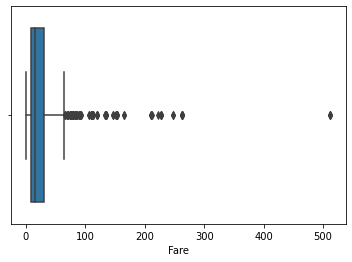

In [ ]:
# Из статистики в п.1 мне не понравилась максимальная стоимость, на графике явно видно выброс
get_boxplot(data1, columns = ['Fare'])

In [ ]:
data2[data2['Fare'] > 300]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_b_A,Cabin_b_B,Cabin_b_C,Cabin_b_D,Cabin_b_E,Cabin_b_F,Cabin_b_G,Cabin_b_T
258,1,1,35,0,0,512,1,0,0,1,0,0,0,0,0,0
679,1,1,36,0,1,512,0,1,0,1,0,0,0,0,0,0
737,1,1,35,0,0,512,0,1,0,1,0,0,0,0,0,0


Посмотрев поближе на эти данные, я не хочу их удалять. По этой стоимости билеты у троих пассажиров из 1 класса. Думаю, это не ошибка, а какой-нибудь суперлюкс для одной семьи.

# 8.*Постройте 1-2 графика на выбор.

Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [ ]:
sns.set (font_scale= 1.2 )

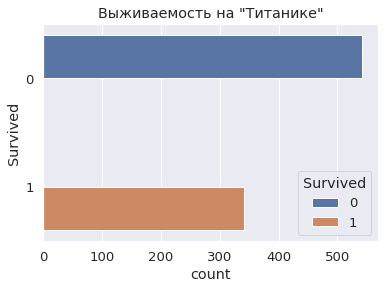

In [ ]:
sns.countplot(data=data2, y='Survived', hue='Survived').set(title='Выживаемость на "Титанике"');

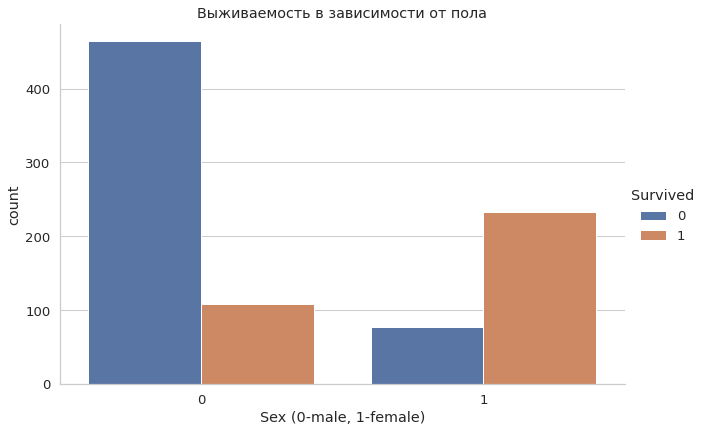

In [ ]:
sns.set_style('whitegrid')
sns.catplot(x='Sex_female', data=data2, kind='count', hue='Survived', height= 6 , aspect= 1.5).set(xlabel='Sex (0-male, 1-female)', title='Выживаемость в зависимости от пола');

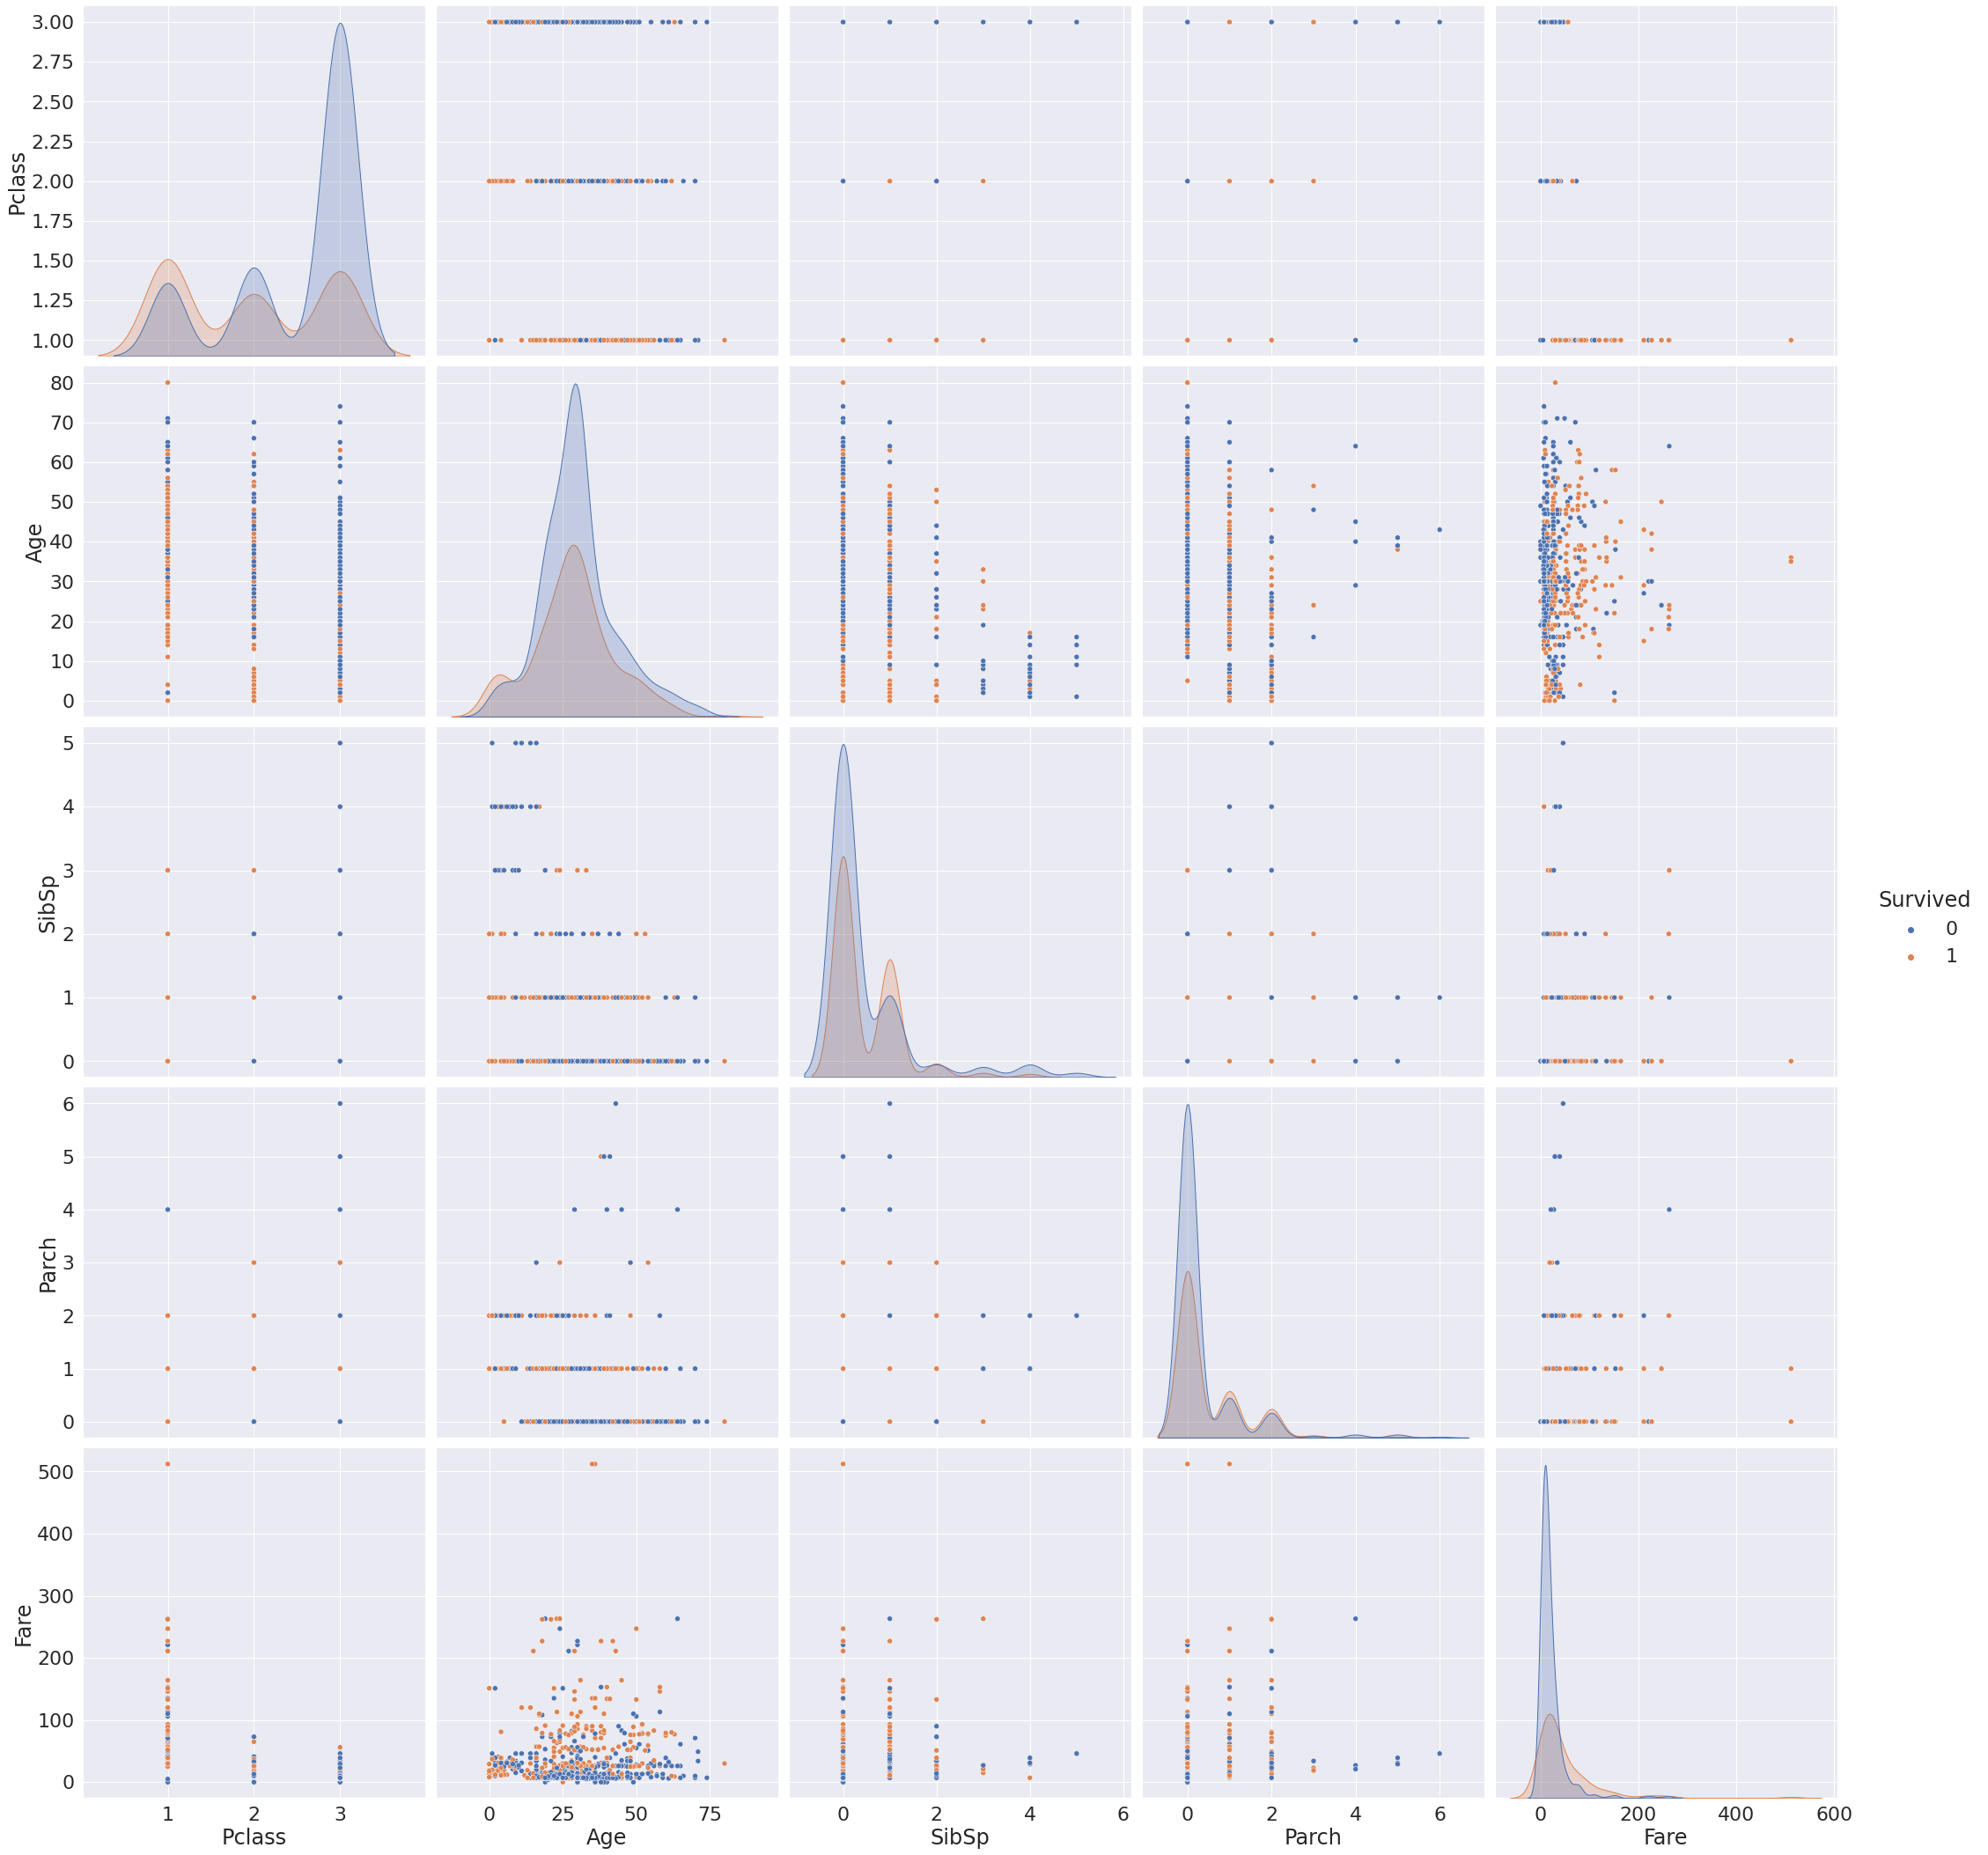

In [ ]:
sns.set (font_scale= 2 )
sns.pairplot(
    data2,
    x_vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
    y_vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
    hue='Survived', height= 6,
);

Из графиков можно сделать следующие выводы о влиянии признаков на выживаемость:

- Pclass - выживаемость зависит от класса (в 1 классе - бОльшинство выжило, в 3 классе подавляющее число пассажиров погибло);
 - Age - прослеживается детская выживаемость почти одинаковая для всех классов (в 3 классе больше погибших детей);
  - SibSp, Parch  - тоже видно влияние на выживаемость - нет выживших в семьях с большим количеством детей;
  - Fare - очень сильное влияние на выживаемость - чем дороже билет, тем лучше выживаемость;
  - Sex - видно, что смертность среди мужчин гораздо выше, чем у женщин.


# 9.*Попробуйте математически преобразовать признак Age.

Не уверена, что правильно поняла это задание.

Сделаю преобразование через бинирование со своими интервалами.

In [ ]:
age_labels_8 = ['0-5','6-10', '11-16', '17-25', '26-40', '41-65','66-80']
age_bins = [0, 5, 10, 16, 25, 40, 65,80]

data2['Age_bin_1'] = pd.cut(data2['Age'],
                       bins=age_bins,
                       labels=age_labels_8)
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_b_A,Cabin_b_B,Cabin_b_C,Cabin_b_D,Cabin_b_E,Cabin_b_F,Cabin_b_G,Cabin_b_T,Age_bin_1
0,0,3,22,1,0,7,0,1,0,0,0,0,0,1,0,0,17-25
1,1,1,38,1,0,71,1,0,0,0,1,0,0,0,0,0,26-40
2,1,3,26,0,0,7,1,0,0,0,0,0,0,1,0,0,26-40
3,1,1,35,1,0,53,1,0,0,0,1,0,0,0,0,0,26-40
4,0,3,35,0,0,8,0,1,0,0,0,0,0,1,0,0,26-40


In [ ]:
data2['Age_bin_1'].value_counts()

26-40    423
17-25    209
41-65    140
0-5       41
11-16     36
6-10      20
66-80      8
Name: Age_bin_1, dtype: int64

In [ ]:
data2.groupby(['Age_bin_1']).agg({'Age':'median'}).reset_index()

,Age_bin_1,Age
0,0-5,3.0
1,6-10,8.5
2,11-16,15.0
3,17-25,21.0
4,26-40,30.0
5,41-65,49.0
6,66-80,70.5


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    884 non-null    int64   
 1   Pclass      884 non-null    int64   
 2   Age         884 non-null    int64   
 3   SibSp       884 non-null    int64   
 4   Parch       884 non-null    int64   
 5   Fare        884 non-null    int64   
 6   Sex_female  884 non-null    uint8   
 7   Sex_male    884 non-null    uint8   
 8   Cabin_b_A   884 non-null    uint8   
 9   Cabin_b_B   884 non-null    uint8   
 10  Cabin_b_C   884 non-null    uint8   
 11  Cabin_b_D   884 non-null    uint8   
 12  Cabin_b_E   884 non-null    uint8   
 13  Cabin_b_F   884 non-null    uint8   
 14  Cabin_b_G   884 non-null    uint8   
 15  Cabin_b_T   884 non-null    uint8   
 16  Age_bin_1   877 non-null    category
dtypes: category(1), int64(6), uint8(10)
memory usage: 90.5 KB


In [ ]:
bool_series =pd.isnull(data2['Age_bin_1'])
data2[bool_series]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_b_A,Cabin_b_B,Cabin_b_C,Cabin_b_D,Cabin_b_E,Cabin_b_F,Cabin_b_G,Cabin_b_T,Age_bin_1
78,1,2,0,0,2,29,0,1,0,0,0,0,0,1,0,0,NaN
305,1,1,0,1,2,151,0,1,0,0,1,0,0,0,0,0,NaN
469,1,3,0,2,1,19,1,0,0,0,0,0,0,1,0,0,NaN
644,1,3,0,2,1,19,1,0,0,0,0,0,0,1,0,0,NaN
755,1,2,0,1,1,14,0,1,0,0,0,0,0,1,0,0,NaN
803,1,3,0,0,1,8,0,1,0,0,0,0,0,1,0,0,NaN
831,1,2,0,1,1,18,0,1,0,0,0,0,0,1,0,0,NaN


In [ ]:
data2['Age_bin_1'] = data2['Age_bin_1'].fillna('0-5')

In [ ]:
data2.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Cabin_b_A     0
Cabin_b_B     0
Cabin_b_C     0
Cabin_b_D     0
Cabin_b_E     0
Cabin_b_F     0
Cabin_b_G     0
Cabin_b_T     0
Age_bin_1     0
dtype: int64

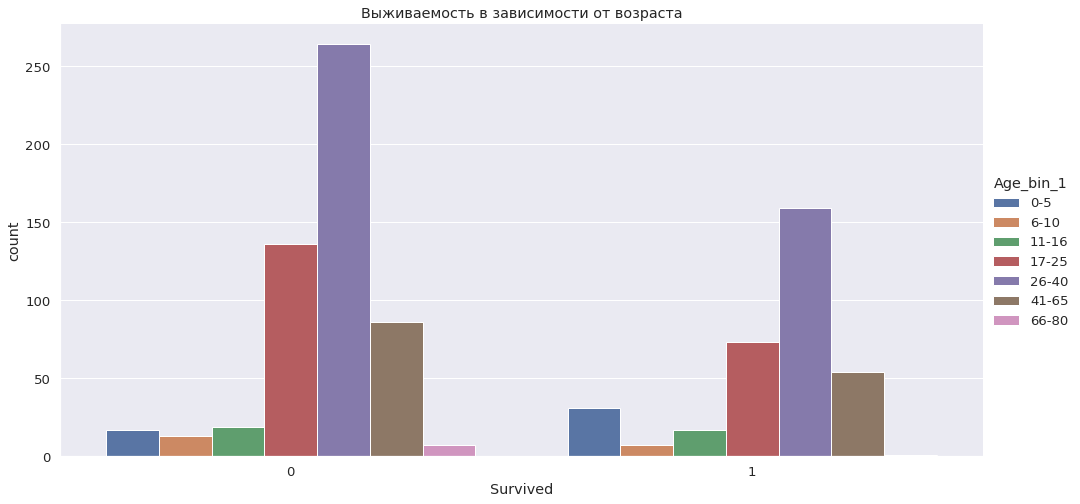

In [ ]:
sns.set (font_scale= 1.2 )
sns.catplot(x='Survived', data=data2, kind='count', hue='Age_bin_1', height= 7 , aspect= 2).set(title='Выживаемость в зависимости от возраста');

In [ ]:
data2=data2.drop(['Age'], axis=1)
data2.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_b_A,Cabin_b_B,Cabin_b_C,Cabin_b_D,Cabin_b_E,Cabin_b_F,Cabin_b_G,Cabin_b_T,Age_bin_1
0,0,3,1,0,7,0,1,0,0,0,0,0,1,0,0,17-25
1,1,1,1,0,71,1,0,0,0,1,0,0,0,0,0,26-40
2,1,3,0,0,7,1,0,0,0,0,0,0,1,0,0,26-40
3,1,1,1,0,53,1,0,0,0,1,0,0,0,0,0,26-40
4,0,3,0,0,8,0,1,0,0,0,0,0,1,0,0,26-40


In [ ]:
data2 = pd.get_dummies (data2, columns = ['Age_bin_1'])

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Survived         884 non-null    int64
 1   Pclass           884 non-null    int64
 2   SibSp            884 non-null    int64
 3   Parch            884 non-null    int64
 4   Fare             884 non-null    int64
 5   Sex_female       884 non-null    uint8
 6   Sex_male         884 non-null    uint8
 7   Cabin_b_A        884 non-null    uint8
 8   Cabin_b_B        884 non-null    uint8
 9   Cabin_b_C        884 non-null    uint8
 10  Cabin_b_D        884 non-null    uint8
 11  Cabin_b_E        884 non-null    uint8
 12  Cabin_b_F        884 non-null    uint8
 13  Cabin_b_G        884 non-null    uint8
 14  Cabin_b_T        884 non-null    uint8
 15  Age_bin_1_0-5    884 non-null    uint8
 16  Age_bin_1_6-10   884 non-null    uint8
 17  Age_bin_1_11-16  884 non-null    uint8
 18  Age_bin_1_

# 10.Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

На преобразованных данных получается несколько другая модель, поскольку в пункте 2 было задание удалить все категориальные данные, а здесь мы эти данные оставили

In [ ]:
X1 = data2[data2.columns[1:]]
X1.head(2)

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_b_A,Cabin_b_B,Cabin_b_C,Cabin_b_D,...,Cabin_b_F,Cabin_b_G,Cabin_b_T,Age_bin_1_0-5,Age_bin_1_6-10,Age_bin_1_11-16,Age_bin_1_17-25,Age_bin_1_26-40,Age_bin_1_41-65,Age_bin_1_66-80
0,3,1,0,7,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0,71,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
Y1 = data2['Survived']
Y1.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Разбиваем данные на обучающую и тестовую выборки в соотношении 80 / 20

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2,random_state = 0)

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(X1_train, Y1_train)

In [ ]:
predictions1 = model1.predict_proba(X1_test)
fpr1, tpr1, thresh1 = roc_curve(Y1_test, predictions1[:,1])

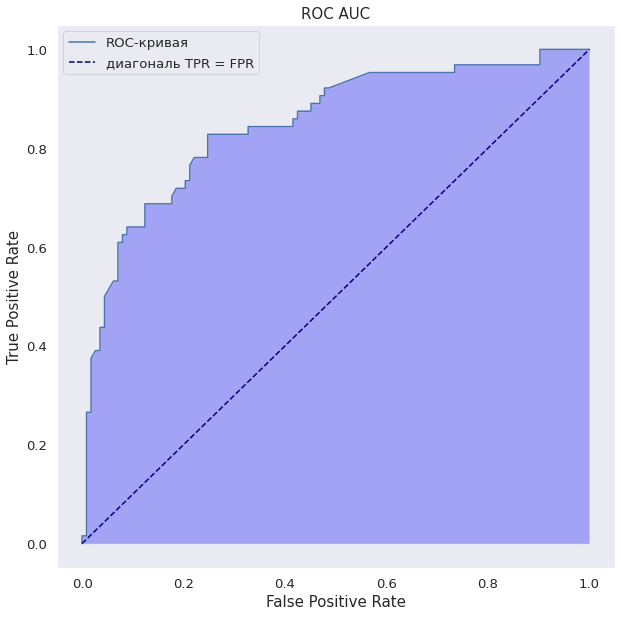

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(fpr1, tpr1, label = 'ROC-кривая')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = 'диагональ TPR = FPR')
plt.fill_between(fpr1, tpr1, facecolor='blue', alpha=0.3)
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.legend( loc = 0 )
plt.grid()
plt.show()

In [ ]:
roc_auc_score(Y1_test, predictions1[:, 1]) # качество модели получилось очень хорошее

0.8487970132743363

# 11.Сформулируйте выводы по проделанной работе.

## a) Кратко опишите какие преобразования были сделаны и почему.


1. После первичного анализа данных из датасета были удалены признаки, которые логически не нужны для построения модели: 'PassengerId','Name','Ticket', 'Embarked'.

2. Также после первичного анализа стало понятно, что возможный процент потерь оставшихся данных из-за удаления пропущенных значений будет ощутимым для нашего небольшого объема датасета.

3. Данные были проверены на наличие выбросов путём построения boxplot.

4. Для признака 'age' пропущенные значения были заполнены медианой по принадлежности к признакам пола и количества родственников на борту. Далее разбили возраст на 7 групп, что позволило сгруппировать данные.

5. Для признака 'cabin' пропуски были восстановлены на основе модели. При этом, для более корректного заполнения пропусков, оптимизировали идентификацию до палубы.

6. Категориальные переменные 'Age'и 'Cabin' перевели в цифровые значения методом pd.get_dummies

## b) Сравните метрики моделей из п. 2 и п. 10.

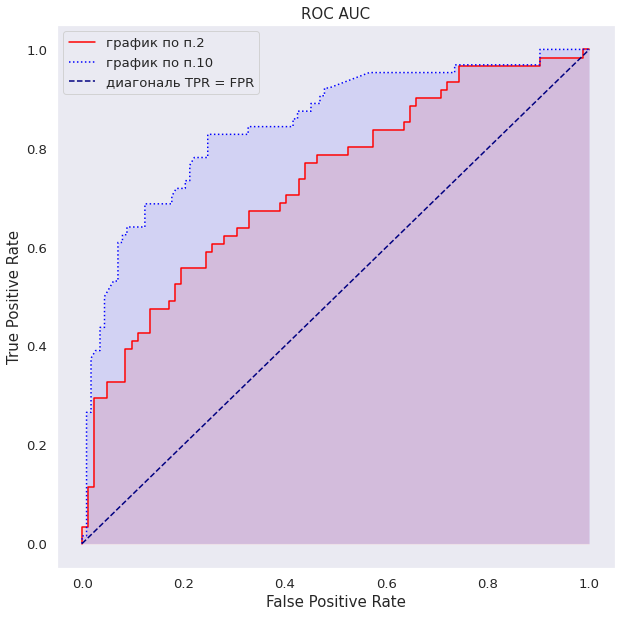

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='red', label = 'график по п.2')
plt.plot(fpr1, tpr1, color='blue', linestyle=':', label = 'график по п.10')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = 'диагональ TPR = FPR' )
plt.fill_between(fpr, tpr, facecolor='red', alpha=0.1)
plt.fill_between(fpr1, tpr1, facecolor='blue', alpha=0.1)
plt.title('ROC AUC', fontdict={'fontsize': 15})
plt.legend( loc = 0 )
plt.grid()
plt.xlabel('False Positive Rate', fontdict={'fontsize': 15})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 15})
plt.show()

ROC-кривая модели по п.10, построенная на преобразованных данных, расположена выше и левее ROC-кривой модели по п.2, построенной на необработанных данных. Это свидетельствует о бОльшей предсказательной способности модели по п.10.

In [ ]:
print('Качество модели по п.2:', roc_auc_score(Y_test, predictions[:, 1]))
print('Качество модели по п.10:', roc_auc_score(Y1_test, predictions1[:, 1]))
print('В результате обработки данных, качество модели увеличилось на', round(-100*((roc_auc_score(Y1_test, predictions1[:, 1]))-(roc_auc_score(Y_test, predictions[:, 1]))/(roc_auc_score(Y_test, predictions[:, 1])))), '%')

Качество модели по п.2: 0.7321071571371451
Качество модели по п.10: 0.8487970132743363
В результате обработки данных, качество модели увеличилось на 15 %


## c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Работа выше показывает, что обработка данных приводит к улучшению качества модели. Следовательно, это целесообразно.

Но, по моему мнению, если объем данных позволяет, то пропуски лучше удалять. Иначе, мы можем сильно исказить данные при замене нулевых значений каким-либо способом.

Думаю, первичный анализ данных необходимо проводить для данных любого объема, в том числе и для действительно больших данных. При этом, если объем пропущенных данных составляет менее 50%, думаю эти пропуски нужно просто удалять на очень больших данных. Обоснование: когда наборы данных становятся большими по количеству признаков, алгоритмы анализа данных сталкиваются с проклятием проблемы размерности, которая ведет к уменьшению метрики.